### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [2]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. 

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

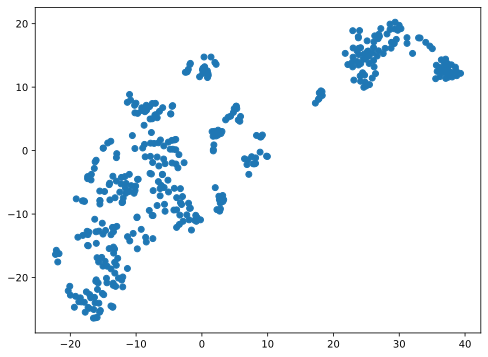

In [6]:
plt.rcParams['figure.figsize'] = 8, 6

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

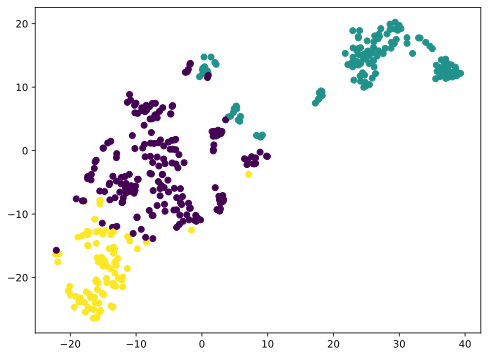

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
for i in range(3):
    print('Кластер {} (тренировочные данные)'.format(i))
    print('Среднее значение price:', y_train.loc[labels_train == i, 'price'].mean())
    print('Среднее значение CRIM:', X_train.loc[labels_train == i, 'CRIM'].mean(), '\n')

Кластер 0 (тренировочные данные)
Среднее значение price: 24.958115183246072
Среднее значение CRIM: 0.4216602094240837 

Кластер 1 (тренировочные данные)
Среднее значение price: 16.165354330708663
Среднее значение CRIM: 10.797028425196851 

Кластер 2 (тренировочные данные)
Среднее значение price: 27.78837209302326
Среднее значение CRIM: 0.07356558139534884 



### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [10]:
labels_test = kmeans.predict(X_test_scaled)

In [11]:
for i in range(3):
    print('Кластер {} (тестовые данные)'.format(i))
    print('Среднее значение price:', y_test.loc[labels_test == i, 'price'].mean())
    print('Среднее значение CRIM:', X_test.loc[labels_test == i, 'CRIM'].mean(), '\n')

Кластер 0 (тестовые данные)
Среднее значение price: 21.860784313725492
Среднее значение CRIM: 0.2660788235294118 

Кластер 1 (тестовые данные)
Среднее значение price: 16.43714285714286
Среднее значение CRIM: 10.165531142857143 

Кластер 2 (тестовые данные)
Среднее значение price: 31.35
Среднее значение CRIM: 0.06206 

